## Практическая работа

В этой работе вам нужно будет подготовить финальный нотбук по задаче предсказания стоимости поддержанного автомобиля, которую мы решали на протяжении нескольких модулей. 
<br>
*Обязательные задачи* помогут проверить, что вы действительно усвоили материал. Если у вас всё получилось, можете переходить к следующей теме.
<br>
Удачи!

Цели практической работы: 

1.   Потренироваться в формировании понятного и структурированного ноутбука по результатам исследования.
2.   Отработать выбор наилучшей предсказательной модели с помощью кросс-валидации. 
3.   На основе результатов метрик научиться делать выводы о переобучении/недообучении модели.
4.   Научиться сохранять обученные модели в формате `pickle`.




Что оценивается:

*   Ноутбук состоит из блоков: каждый блок соответствует определённой фазе работы с задачей.
*   Блоки, которые состоят из нескольких этапов, декомпозированы на подблоки (например, в `Data Preparation` может быть несколько подблоков: `Data cleaning`, `Feature Selection` и тому подобное).
*   Код написан в едином стиле и не нарушает PEP-8.
*   Код покрыт комментариями.
*   Код воспроизводим (то есть проверяющий, запустив ноутбук, получит ровно такие же результаты).
*   Все условия задач выполнены.





## Обязательные задачи

### Постановка общей задачи:



Напомним, что вы работаете с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах. На этих данных вам нужно построить модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

### Описание датасета:



- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.

###  Задачи:

Ниже представлены задачи по проекту построения модели. Выполните их и в отдельном файле соберите финальный ноутбук проекта. 

# *Импорт сторонних библиотек*

В первой ячейке ноутбука импортируйте библиотеки, которые необходимы для работы с данными. Впоследствии все импорты добавляйте в эту ячейку. Структурируйте их по PEP-8. 

[Документация по оформлению import'ов (PEP-8)](https://peps.python.org/pep-0008/#imports)



In [546]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import pickle 

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# *Загрузка данных*

Загрузите данные из файла `df_out`. Выведите размерность и первые 5 строчек данных.

In [308]:
df = pd.read_csv('data/df_out.csv')
print (df.shape)
df.head(5)

(10000, 20)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


### Приведение типов в чтении данных
Решил сразу прочитать данные в нужном формате

In [310]:
df_dtypechange = pd.read_csv('data/df_out.csv',usecols = ['id','price','year','fuel','posting_date'], \
                 dtype = {'price':float,'year':'Int64','fuel':'category'}, parse_dates = ['posting_date'])
df_dtypechange.posting_date = pd.to_datetime(df_dtypechange.posting_date,utc=True)
df_dtypechange

,id,price,year,fuel,posting_date
0,7308295377,54990.0,2020,diesel,2021-04-17 16:30:50+00:00
1,7316380095,16942.0,2016,NaN,2021-05-03 19:40:21+00:00
2,7313733749,35590.0,2017,gas,2021-04-28 10:52:20+00:00
3,7308210929,14500.0,2013,gas,2021-04-17 14:08:57+00:00
4,7316474668,21800.0,2021,gas,2021-05-03 22:32:06+00:00
...,...,...,...,...,...
9995,7304876387,4495.0,2002,gas,2021-04-10 20:33:57+00:00
9996,7316152972,14495.0,2008,gas,2021-05-03 13:36:30+00:00
9997,7310993818,8995.0,2011,gas,2021-04-22 19:14:01+00:00
9998,7306637427,31900.0,2015,hybrid,2021-04-14 14:14:42+00:00


In [311]:
print(df.dtypes)
print(df_dtypechange.dtypes)

id                  int64
url                object
region             object
region_url         object
price               int64
year              float64
manufacturer       object
model              object
fuel               object
odometer            int64
title_status       object
transmission       object
image_url          object
description        object
state              object
lat               float64
long              float64
posting_date       object
price_category     object
date               object
dtype: object
id                            int64
price                       float64
year                          Int64
fuel                       category
posting_date    datetime64[ns, UTC]
dtype: object


In [312]:
df_total = pd.merge(left=df.drop(columns=['price','year','posting_date','fuel']),right=df_dtypechange,on='id',how='outer')
df_total
print(df_total.shape)

(10000, 20)


In [313]:
print(df_total.dtypes)

id                              int64
url                            object
region                         object
region_url                     object
manufacturer                   object
model                          object
odometer                        int64
title_status                   object
transmission                   object
image_url                      object
description                    object
state                          object
lat                           float64
long                          float64
price_category                 object
date                           object
price                         float64
year                            Int64
fuel                         category
posting_date      datetime64[ns, UTC]
dtype: object


# *Data Preparation*

Объявите блок Data Preparation. В этом блоке:
* произведите преобразование типов данных, если нужно;
* исследуйте данные на пропуски, обработайте их (например, заполните какими-то значениями);
* избавьтесь от аномалий, если нужно.

В решении данной задачи опирайтесь на результаты работы в 17-19 модулях блока Data Preparation. Исследование данных подкрепляйте соответствующей визуализацией в виде графиков, таблиц или статистических значений.

Декомпозируйте блок на подблоки.


## Определение пропущенных значений, обработка пропусков

In [316]:
missing_values = ((df_total.isna().sum()/len(df_total))*100).sort_values()
missing_values

id                0.00
url               0.00
region            0.00
region_url        0.00
manufacturer      0.00
price             0.00
odometer          0.00
price_category    0.00
state             0.00
date              0.02
image_url         0.02
description       0.02
posting_date      0.02
year              0.36
transmission      0.45
fuel              0.63
lat               0.98
long              0.98
model             1.28
title_status      1.66
dtype: float64

<Axes: >

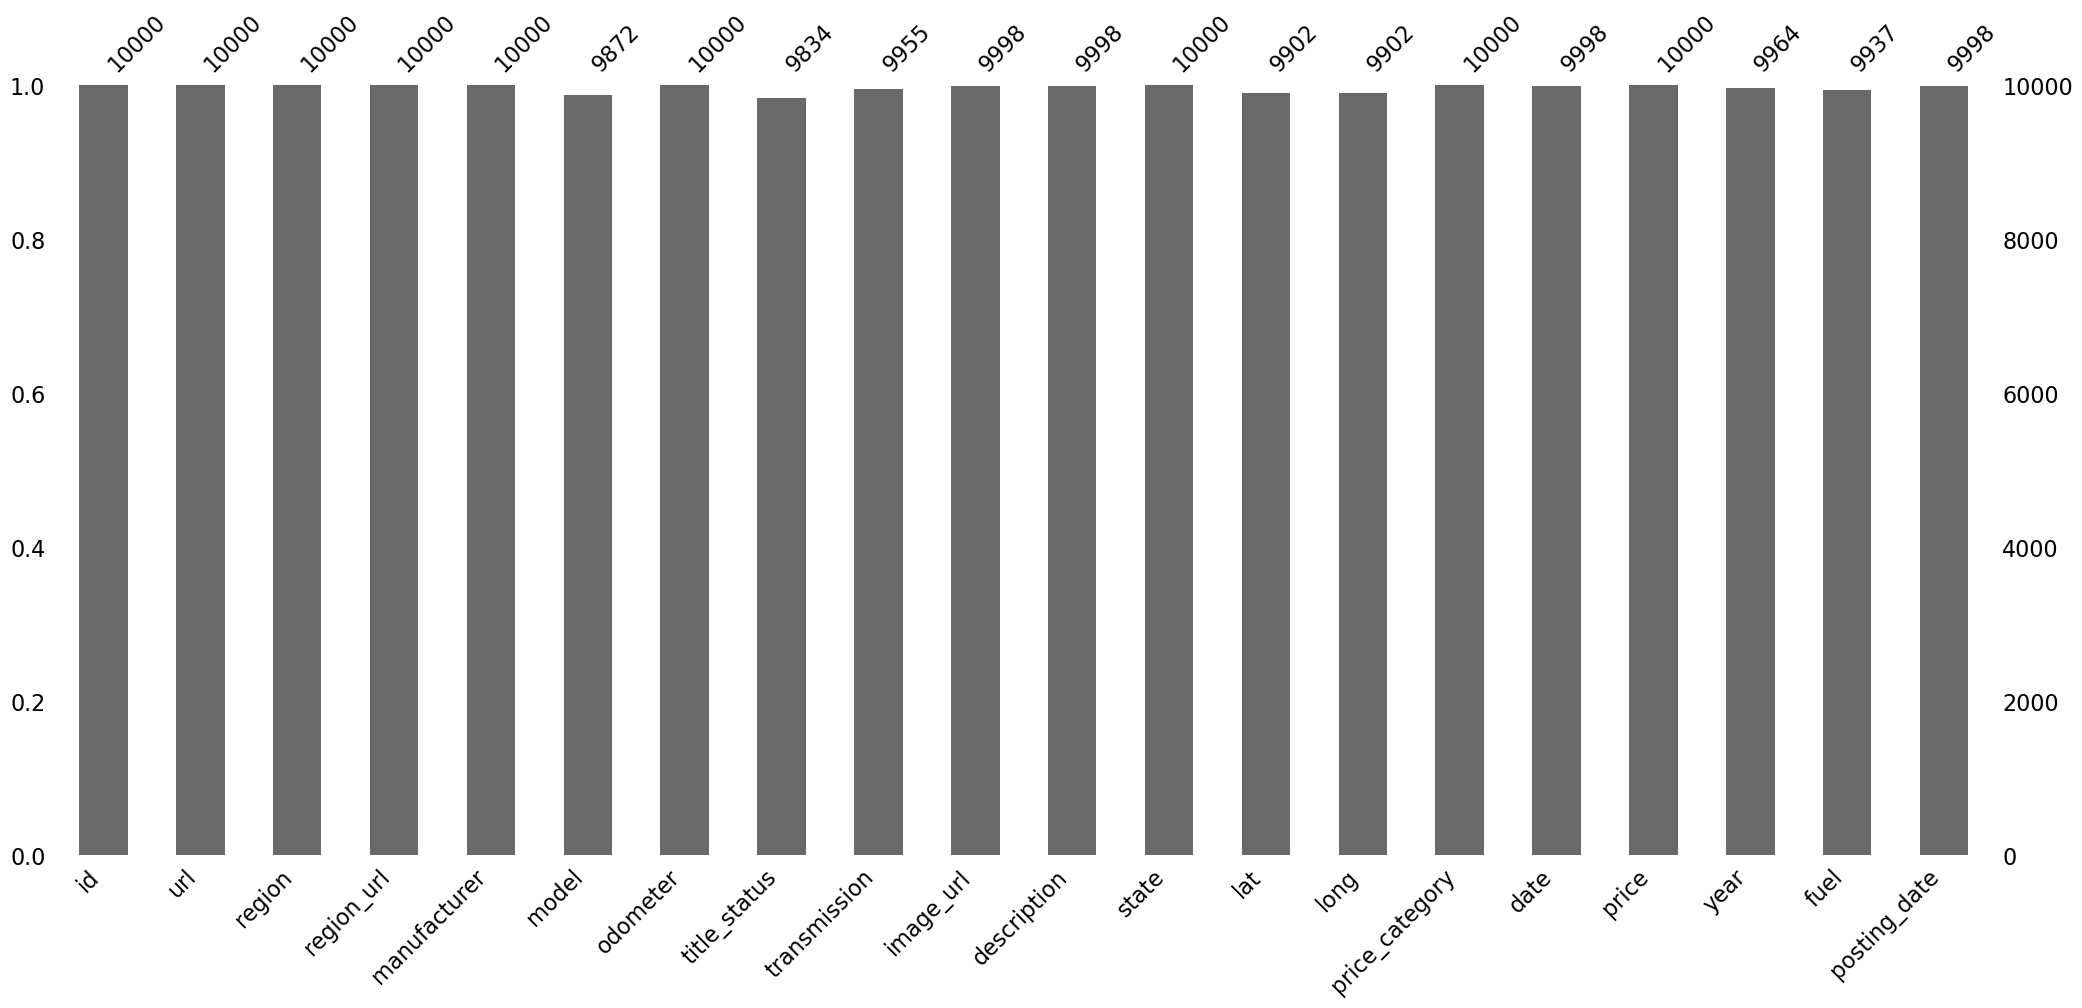

In [317]:
msno.bar(df_total)

In [318]:
df_clean = df_total.copy()
df_clean.shape

(10000, 20)

In [319]:
df_clean[df_clean.year.isna()] #можно взять 4 символа из описания автомобиля, но это можно сделать попозже, пока просто удалим эти данные

,id,url,region,region_url,manufacturer,model,odometer,title_status,transmission,image_url,description,state,lat,long,price_category,date,price,year,fuel,posting_date
0,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,other,NaN,95674,NaN,NaN,NaN,NaN,wa,NaN,NaN,medium,NaN,11999.0,<NA>,NaN,NaT
565,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,other,Transit Cargo Van,567,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,high,2021-04-07 21:10:06+00:00,35850.0,<NA>,gas,2021-04-07 21:10:06+00:00
806,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,other,500,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,high,2021-04-09 13:31:03+00:00,35880.0,<NA>,gas,2021-04-09 13:31:03+00:00
1051,7304693422,https://shreveport.craigslist.org/ctd/d/vicksb...,shreveport,https://shreveport.craigslist.org,other,ierra 1500,35676,NaN,automatic,https://images.craigslist.org/00O0O_cpIkn2jwHN...,2020 *GMC* *Sierra 1500* SIERRA 1500 AT4 4X4 5...,la,32.332046,-90.857163,high,2021-04-10 15:44:02+00:00,53700.0,<NA>,gas,2021-04-10 15:44:02+00:00
1058,7304711487,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,other,Odyssey,21,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,high,2021-04-10 16:12:15+00:00,67900.0,<NA>,gas,2021-04-10 16:12:15+00:00
1736,7306678710,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,other,n Maxima,28367,clean,automatic,https://images.craigslist.org/01010_4uw9b06xiS...,2018 *Nissan* *Maxima* SR 3.5L Midnight Editio...,fl,29.676827,-82.319202,high,2021-04-14 15:25:14+00:00,26975.0,<NA>,gas,2021-04-14 15:25:14+00:00
1775,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,other,Grand Caravan,21,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,high,2021-04-14 16:51:36+00:00,38900.0,<NA>,NaN,2021-04-14 16:51:36+00:00
2017,7307209305,https://northmiss.craigslist.org/ctd/d/vicksbu...,north mississippi,https://northmiss.craigslist.org,other,500,12338,NaN,automatic,https://images.craigslist.org/00E0E_hZTYK06AGo...,2020 *Ram* *3500* RAM 3500 DUALLY 4X4 CUMMINS ...,ms,32.332046,-90.857163,high,2021-04-15 15:45:56+00:00,64900.0,<NA>,diesel,2021-04-15 15:45:56+00:00
2941,7309216259,https://omaha.craigslist.org/ctd/d/omaha-2019-...,omaha / council bluffs,https://omaha.craigslist.org,other,Enclave,1036,rebuilt,automatic,https://images.craigslist.org/01010_1PAwiL9HwM...,2019 *Buick* *Enclave* AWD 4dr Essence SUV - $...,ia,41.207382,-96.023096,high,2021-04-19 14:30:41+00:00,29995.0,<NA>,gas,2021-04-19 14:30:41+00:00
3230,7309869204,https://scottsbluff.craigslist.org/ctd/d/denve...,scottsbluff / panhandle,https://scottsbluff.craigslist.org,other,Grand Caravan,19,clean,automatic,https://images.craigslist.org/00V0V_72KAx8GRuN...,2019 *Dodge* *Grand Caravan* SE Plus Wagon - $...,ne,39.674406,-104.998604,high,2021-04-20 16:41:16+00:00,48900.0,<NA>,NaN,2021-04-20 16:41:16+00:00


In [320]:
def print_useful_rows_info(df):
    print ('количество полностью заполненных объектов из всей выборки:',len(df.dropna()))
    print ('процент полностью заполненных объектов из всей выборки:', round(len(df.dropna())/len(df)*100,2))
print_useful_rows_info(df_clean)

количество полностью заполненных объектов из всей выборки: 9507
процент полностью заполненных объектов из всей выборки: 95.07


In [321]:
df_clean = df_clean[df_clean.year.notna()]
df_clean.fuel = df_clean.fuel.fillna('other')
df_clean.model = df_clean.model.fillna('other')
df_clean['title_status'] = df_clean['title_status'].fillna(df_clean['title_status'].mode()[0])
df_clean['transmission'] = df_clean['transmission'].fillna(df_clean['transmission'].mode()[0])
df_clean['lat'] = df_clean['lat'].fillna(df_clean['lat'].mode()[0])
df_clean['long'] = df_clean['long'].fillna(df_clean['long'].mode()[0])
#df = df[df.posting_date.notna()]
df_clean.shape

(9964, 20)

In [322]:
print_useful_rows_info(df_clean)

количество полностью заполненных объектов из всей выборки: 9964
процент полностью заполненных объектов из всей выборки: 100.0


In [323]:
missing_values = ((df_clean.isna().sum()/len(df_clean))*100).sort_values()
missing_values

id                0.0
year              0.0
price             0.0
date              0.0
price_category    0.0
long              0.0
lat               0.0
state             0.0
description       0.0
image_url         0.0
transmission      0.0
title_status      0.0
odometer          0.0
model             0.0
manufacturer      0.0
region_url        0.0
region            0.0
url               0.0
fuel              0.0
posting_date      0.0
dtype: float64

### Визуализация и обработка аномалий

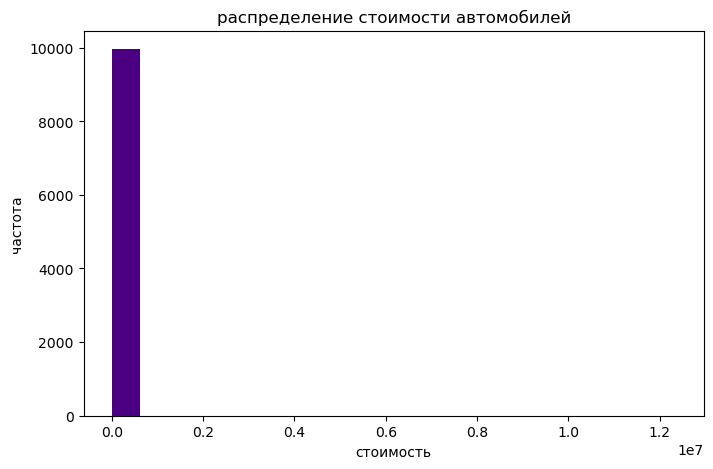

In [325]:
plt.figure(figsize=(8,5))
plt.hist(df_clean.price,bins=20,color='indigo')
plt.xlabel('стоимость')
plt.ylabel('частота')
plt.title('распределение стоимости автомобилей');

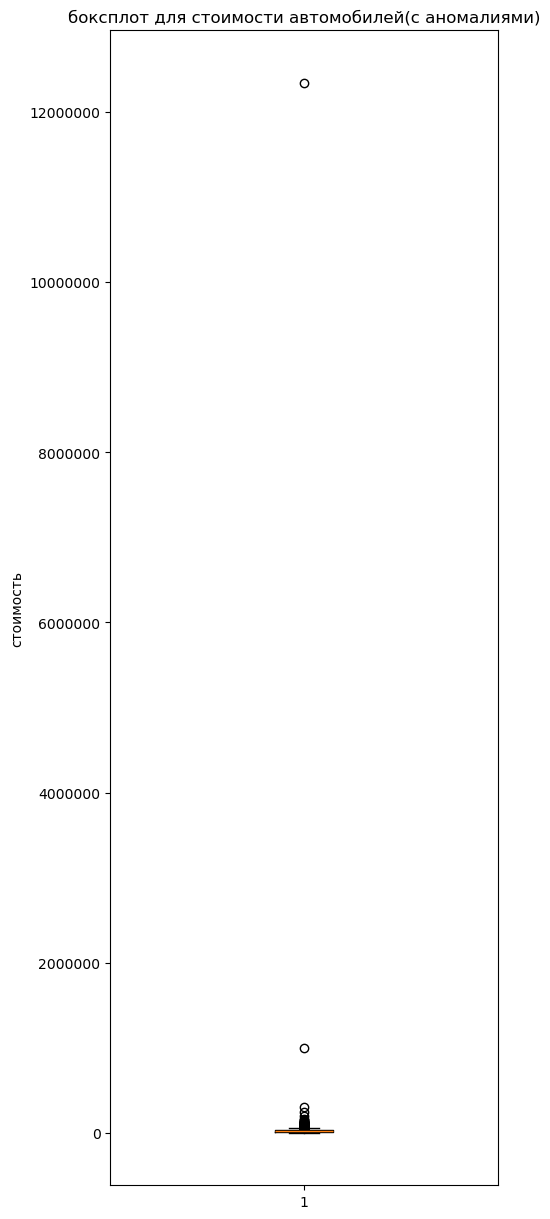

In [326]:
from matplotlib.ticker import FormatStrFormatter
fig,ax=plt.subplots(figsize=(5,15))
ax.boxplot(df_clean.price)
ax.set_ylabel('стоимость')
ax.set_title('боксплот для стоимости автомобилей(с аномалиями)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#df.price.describe().apply(lambda x:f"{x:0.3f}")

In [327]:
def calculate_outliers(data):
    q25=data.quantile(0.25)
    q75=data.quantile(0.75)
    iqr=q75-q25
    boundaries=(q25-1.5*iqr,q75+1.5*iqr)
    return boundaries
print('нижний порог нормальных значений',calculate_outliers(df_clean.price)[0],'минимальное значение',df_clean.price.min())
print('верхний порог нормальных значений',calculate_outliers(df_clean.price)[1],'максимальное значение',df_clean.price.max())


нижний порог нормальных значений -22235.0 минимальное значение 500.0
верхний порог нормальных значений 58125.0 максимальное значение 12345678.0


In [328]:
boundaries = calculate_outliers(df_clean.price)
is_outlier=(df_clean.price<boundaries[0])|(df_clean.price>boundaries[1])
is_outlier.sum()
df_new=df_clean[~is_outlier]
df_new.head()
print(df_new.shape)

(9757, 20)


In [329]:
boundaries_year = calculate_outliers(df_new.year)
boundaries_year
is_outlier = (df_new.year<boundaries_year[0])|(df_new.year>boundaries_year[1])
is_outlier.sum()
df_new.loc[is_outlier,'year'] = int(boundaries_year[0])

In [330]:
df_new.year.describe()

count         9757.0
mean     2011.569437
std          6.49422
min           1994.0
25%           2008.0
50%           2013.0
75%           2017.0
max           2022.0
Name: year, dtype: Float64

# 3. *Feature engineering*

Объявите блок Feature engineering. В этом блоке:
* подготовьте категориальные переменные с помощью OneHotEncoder;
* стандартизируйте и нормализуйте переменные, если нужно;
* создайте новые признаки на основе информации в датафрейме (на основе дат, текстовых значений переменных, и так далее);
* удалите неинформативные колонки, которые появились в датасете в результате Feature engineering;
* сформируйте финальный датасет, на котором будет производиться моделирование, и сохраните его в отдельный файл.

В решении данной задачи опирайтесь на результаты работы в 20 модуле блока Data Preparation. Исследование подкрепляйте соответствующей визуализацией в виде графиков, таблиц или матриц корреляций, если это нужно.

Декомпозируйте блок на подблоки.

In [332]:
pd.options.mode.copy_on_write = True

In [333]:
df_new.odometer

1        40000
3        19139
4        31047
6        39558
7        54319
         ...  
9995    134977
9996     95000
9997    156925
9998    100259
9999     62774
Name: odometer, Length: 9757, dtype: int64

In [334]:
df_new['odometer_km'] = df_new.apply(lambda x: x.odometer  * 1.609344, axis=1)
df_new['odometer_km']

1        64373.760000
3        30801.234816
4        49965.303168
6        63662.429952
7        87417.956736
            ...      
9995    217224.425088
9996    152887.680000
9997    252546.307200
9998    161351.220096
9999    101024.960256
Name: odometer_km, Length: 9757, dtype: float64

In [335]:
df_new['odometer/price'] = df_new.apply(lambda x: x.odometer / x.price, axis=1)
df_new['odometer/price']

1        2.112267
3        0.523066
4        1.150315
6        0.999192
7        1.811237
          ...    
9995     3.139365
9996     5.592183
9997    10.465155
9998    11.146081
9999     2.730373
Name: odometer/price, Length: 9757, dtype: float64

In [336]:
df_new['region_new'] = df_new.region_url.apply(lambda x: x.lower().split('://')[1].split('.')[0])
df_new['region_new']

1         neworleans
3       santabarbara
4             pueblo
6         santamaria
7       santabarbara
            ...     
9995          dallas
9996         seattle
9997         seattle
9998         seattle
9999         seattle
Name: region_new, Length: 9757, dtype: object

In [337]:
df_new[df_new['region'] != df_new['region_new']].region.unique()

array(['new orleans', 'santa barbara', 'santa maria', 'rochester',
       'treasure coast', 'lehigh valley', 'saginaw-midland-baycity',
       'myrtle beach', 'twin tiers NY/PA', 'central michigan',
       'killeen / temple / ft hood', 'hickory / lenoir', 'rhode island',
       'jackson', 'eastern CT', 'oregon coast', 'state college',
       'richmond', 'east oregon', 'lima / findlay',
       'columbia / jeff city', 'northwest OK', 'ann arbor',
       'florida keys', 'tyler / east TX', 'southeast missouri',
       'tri-cities', 'lewiston / clarkston', 'olympic peninsula',
       'scranton / wilkes-barre', 'winston-salem', 'twin falls',
       'macon / warner robins', 'little rock', 'hudson valley',
       'anchorage / mat-su', 'western massachusetts', 'el paso',
       'eau claire', 'northwest CT', 'jacksonville', 'bloomington-normal',
       'fargo / moorhead', 'st cloud', 'altoona-johnstown', 'albany',
       'medford-ashland', 'fort collins / north CO', 'san luis obispo',
       'gr

In [338]:
df_new['region_corrected'] = df_new['region'].apply(lambda x: x.lower().split('/')[0].replace(' ', '').replace('-', ''))
df_new['region_corrected']

1          neworleans
3        santabarbara
4              pueblo
6          santamaria
7        santabarbara
            ...      
9995           dallas
9996    seattletacoma
9997    seattletacoma
9998    seattletacoma
9999    seattletacoma
Name: region_corrected, Length: 9757, dtype: object

In [339]:
df_new['desc_len'] = df_new.apply(lambda x: len(x.description) , axis=1)
df_new['desc_len']

1       8293
3       4417
4       3956
6       5084
7       5232
        ... 
9995    4845
9996    1121
9997    2874
9998    2635
9999    8893
Name: desc_len, Length: 9757, dtype: int64

In [340]:
df_new['model_in_desc'] = df_new.apply(lambda x: x.description.count(x.model) , axis=1)
df_new['model_in_desc']

1        0
3        0
4        0
6        0
7        0
        ..
9995    28
9996     0
9997     0
9998     0
9999     0
Name: model_in_desc, Length: 9757, dtype: int64

In [341]:
df_new['age_category'] =  df_new.apply(lambda x: "new" if x.year > 2013 else ("old" if x.year < 2006 else "average"), axis=1)
df_new['age_category']

1       average
3           new
4           new
6           new
7           new
         ...   
9995        new
9996    average
9997        old
9998        old
9999    average
Name: age_category, Length: 9757, dtype: object

In [342]:
df_new['model_len'] = df_new.apply(lambda x: len(x.model) , axis=1)
df_new['model_word_count'] = df_new.apply(lambda x: len(x.model.split(' ')), axis=1)
df_new['short_model']=df_new.model.apply(lambda x: x.split(' ')[0])


In [343]:
df_new.manufacturer.unique()

array(['other', 'acura', 'infiniti', 'mercedes-benz', 'bmw', 'chevrolet',
       'jaguar', 'kia', 'lincoln', 'cadillac', 'audi', 'nissan',
       'volkswagen', 'buick', 'subaru', 'honda', 'ford', 'toyota',
       'dodge', 'lexus', 'jeep', 'gmc', 'alfa-romeo', 'chrysler',
       'hyundai', 'ram', 'mitsubishi', 'mercury', 'mazda', 'volvo',
       'rover', 'mini', 'pontiac', 'porsche', 'saturn', 'fiat', 'tesla',
       'harley-davidson', 'ferrari', 'datsun'], dtype=object)

In [344]:
data = df_new[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category','fuel']]
data

,short_model,transmission,region,manufacturer,state,title_status,age_category,fuel
1,FordE350,automatic,new orleans,other,la,clean,average,gas
3,mdx,automatic,santa barbara,acura,ca,clean,new,other
4,qx60,automatic,pueblo,infiniti,co,clean,new,other
6,c-class,automatic,santa maria,mercedes-benz,ca,clean,new,gas
7,7,other,santa barbara,bmw,ca,clean,new,other
...,...,...,...,...,...,...,...,...
9995,3500,automatic,dallas / fort worth,ram,tx,clean,new,diesel
9996,odyssey,automatic,seattle-tacoma,honda,wa,clean,average,gas
9997,e-series,automatic,seattle-tacoma,ford,wa,clean,old,gas
9998,astro,automatic,seattle-tacoma,chevrolet,wa,clean,old,gas


In [345]:
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(data)
ohe_categories = ohe.transform(data)
ohe_categories

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [346]:
df_new[ohe.get_feature_names_out()] = ohe_categories
df_defrag = df_new.copy()
df_defrag.shape

C:\Users\Pavel\AppData\Local\Temp\ipykernel_4800\254392033.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[ohe.get_feature_names_out()] = ohe_categories
C:\Users\Pavel\AppData\Local\Temp\ipykernel_4800\254392033.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[ohe.get_feature_names_out()] = ohe_categories
C:\Users\Pavel\AppData\Local\Temp\ipykernel_4800\254392033.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

(9757, 1483)

In [347]:
quantities = df_defrag[['odometer','price','lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count']]
std_scaler = StandardScaler()
std_scaler.fit(quantities)
std_scaled_quantities = std_scaler.transform(quantities)

#df_defrag[quantities_renamed]=std_scaled_quantities

In [348]:
quantities_renamed = [(item+'_std') for item in std_scaler.get_feature_names_out()]
quantities_renamed

['odometer_std',
 'price_std',
 'lat_std',
 'long_std',
 'year_std',
 'odometer/price_std',
 'desc_len_std',
 'model_in_desc_std',
 'model_len_std',
 'model_word_count_std']

In [349]:
df_defrag[quantities_renamed]=std_scaled_quantities
df_defrag

,id,url,region,region_url,manufacturer,model,odometer,title_status,transmission,image_url,...,odometer_std,price_std,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std
1,7301585523,https://neworleans.craigslist.org/ctd/d/atlant...,new orleans,https://neworleans.craigslist.org,other,FordE350,40000,clean,automatic,https://images.craigslist.org/00000_1OnOeehSUH...,...,-0.872234,0.070055,-0.844407,0.532245,-0.087688,-0.450814,2.000635,-0.155605,-0.450519,-0.787975
3,7301596309,https://santabarbara.craigslist.org/ctd/d/atla...,santa barbara,https://santabarbara.craigslist.org,acura,mdx advance and,19139,clean,automatic,https://images.craigslist.org/00c0c_dHHPTmtAA4...,...,-1.204444,1.481876,-0.850375,0.527162,0.990249,-0.507267,0.596701,-0.155605,0.360862,0.567384
4,7301596315,https://pueblo.craigslist.org/ctd/d/atlanta-20...,pueblo,https://pueblo.craigslist.org,infiniti,qx60 3.5 sport utility,31047,clean,automatic,https://images.craigslist.org/00606_4lxRZhOtFD...,...,-1.014810,0.714104,-0.850375,0.527162,0.990249,-0.484985,0.429722,-0.155605,1.172242,1.245063
6,7301600003,https://santamaria.craigslist.org/ctd/d/atlant...,santa maria,https://santamaria.craigslist.org,mercedes-benz,c-class c 63 amg,39558,clean,automatic,https://images.craigslist.org/00l0l_iUnZc3AAkA...,...,-0.879273,1.721804,-0.850375,0.527162,0.374285,-0.490354,0.838297,-0.155605,0.476773,1.245063
7,7301600034,https://santabarbara.craigslist.org/ctd/d/atla...,santa barbara,https://santabarbara.craigslist.org,bmw,7 series 750i sedan 4d,54319,clean,other,https://images.craigslist.org/00L0L_jyFezJHWGI...,...,-0.644205,0.954033,-0.850375,0.527162,0.528276,-0.461507,0.891904,-0.155605,1.172242,1.922742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7317080941,https://dallas.craigslist.org/ftw/ctd/d/lewisv...,dallas / fort worth,https://dallas.craigslist.org,ram,3500,134977,clean,automatic,https://images.craigslist.org/00g0g_8dmIfFRG0x...,...,0.640269,1.994123,-0.975413,-0.179681,0.990249,-0.414328,0.751728,11.725504,-0.914165,-0.787975
9996,7317081871,https://seattle.craigslist.org/tac/ctd/d/bonne...,seattle-tacoma,https://seattle.craigslist.org,honda,odyssey ex-l,95000,clean,automatic,https://images.craigslist.org/00C0C_8XyrsUaBZO...,...,0.003637,-0.085818,1.487298,-1.591004,0.066303,-0.327197,-0.597149,-0.155605,0.013127,-0.110296
9997,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,ford,e-series van universal by glaval designer luxu...,156925,clean,automatic,https://images.craigslist.org/00r0r_13JUlXZOMl...,...,0.989789,-0.245211,1.180725,-1.616226,-2.705535,-0.154094,0.037808,-0.155605,10.213338,8.699535
9998,7317089302,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,chevrolet,astro ls 2-owner 100k miles 4.3l v6 190hp 250f...,100259,clean,automatic,https://images.craigslist.org/00E0E_gKsPNK9Xxk...,...,0.087387,-0.725068,1.180725,-1.616226,-1.473607,-0.129906,-0.048760,-0.155605,4.765498,5.311139


In [350]:
minmax_scaler_geo=MinMaxScaler()
minmax_scaler_geo.fit(df_defrag[['lat','long']])
minmax_scaled_geo = minmax_scaler_geo.transform(df_defrag[['lat','long']])
minmax_scaled_geo
minmax_scaled_geo.shape
quantities_renamed_geo = ['lat_mm', 'long_mm']
quantities_renamed
df_defrag[quantities_renamed_geo]=minmax_scaled_geo
df_defrag

,id,url,region,region_url,manufacturer,model,odometer,title_status,transmission,image_url,...,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,lat_mm,long_mm
1,7301585523,https://neworleans.craigslist.org/ctd/d/atlant...,new orleans,https://neworleans.craigslist.org,other,FordE350,40000,clean,automatic,https://images.craigslist.org/00000_1OnOeehSUH...,...,-0.844407,0.532245,-0.087688,-0.450814,2.000635,-0.155605,-0.450519,-0.787975,0.314473,0.292248
3,7301596309,https://santabarbara.craigslist.org/ctd/d/atla...,santa barbara,https://santabarbara.craigslist.org,acura,mdx advance and,19139,clean,automatic,https://images.craigslist.org/00c0c_dHHPTmtAA4...,...,-0.850375,0.527162,0.990249,-0.507267,0.596701,-0.155605,0.360862,0.567384,0.313722,0.291889
4,7301596315,https://pueblo.craigslist.org/ctd/d/atlanta-20...,pueblo,https://pueblo.craigslist.org,infiniti,qx60 3.5 sport utility,31047,clean,automatic,https://images.craigslist.org/00606_4lxRZhOtFD...,...,-0.850375,0.527162,0.990249,-0.484985,0.429722,-0.155605,1.172242,1.245063,0.313722,0.291889
6,7301600003,https://santamaria.craigslist.org/ctd/d/atlant...,santa maria,https://santamaria.craigslist.org,mercedes-benz,c-class c 63 amg,39558,clean,automatic,https://images.craigslist.org/00l0l_iUnZc3AAkA...,...,-0.850375,0.527162,0.374285,-0.490354,0.838297,-0.155605,0.476773,1.245063,0.313722,0.291889
7,7301600034,https://santabarbara.craigslist.org/ctd/d/atla...,santa barbara,https://santabarbara.craigslist.org,bmw,7 series 750i sedan 4d,54319,clean,other,https://images.craigslist.org/00L0L_jyFezJHWGI...,...,-0.850375,0.527162,0.528276,-0.461507,0.891904,-0.155605,1.172242,1.922742,0.313722,0.291889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7317080941,https://dallas.craigslist.org/ftw/ctd/d/lewisv...,dallas / fort worth,https://dallas.craigslist.org,ram,3500,134977,clean,automatic,https://images.craigslist.org/00g0g_8dmIfFRG0x...,...,-0.975413,-0.179681,0.990249,-0.414328,0.751728,11.725504,-0.914165,-0.787975,0.297988,0.241987
9996,7317081871,https://seattle.craigslist.org/tac/ctd/d/bonne...,seattle-tacoma,https://seattle.craigslist.org,honda,odyssey ex-l,95000,clean,automatic,https://images.craigslist.org/00C0C_8XyrsUaBZO...,...,1.487298,-1.591004,0.066303,-0.327197,-0.597149,-0.155605,0.013127,-0.110296,0.607880,0.142348
9997,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,ford,e-series van universal by glaval designer luxu...,156925,clean,automatic,https://images.craigslist.org/00r0r_13JUlXZOMl...,...,1.180725,-1.616226,-2.705535,-0.154094,0.037808,-0.155605,10.213338,8.699535,0.569303,0.140568
9998,7317089302,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,chevrolet,astro ls 2-owner 100k miles 4.3l v6 190hp 250f...,100259,clean,automatic,https://images.craigslist.org/00E0E_gKsPNK9Xxk...,...,1.180725,-1.616226,-1.473607,-0.129906,-0.048760,-0.155605,4.765498,5.311139,0.569303,0.140568


In [351]:
geo = df_defrag[['lat','lat_std', 'lat_mm', 'long', 'long_std', 'long_mm']]
geo

,lat,lat_std,lat_mm,long,long_std,long_mm
1,33.820600,-0.844407,0.314473,-84.354900,0.532245,0.292248
3,33.786500,-0.850375,0.313722,-84.445400,0.527162,0.291889
4,33.786500,-0.850375,0.313722,-84.445400,0.527162,0.291889
6,33.786500,-0.850375,0.313722,-84.445400,0.527162,0.291889
7,33.786500,-0.850375,0.313722,-84.445400,0.527162,0.291889
...,...,...,...,...,...,...
9995,33.072084,-0.975413,0.297988,-97.032436,-0.179681,0.241987
9996,47.143000,1.487298,0.607880,-122.164400,-1.591004,0.142348
9997,45.391373,1.180725,0.569303,-122.613533,-1.616226,0.140568
9998,45.391373,1.180725,0.569303,-122.613533,-1.616226,0.140568


In [352]:
geo.describe()

,lat,lat_std,lat_mm,long,long_std,long_mm
count,9757.000000,9.757000e+03,9757.000000,9757.000000,9.757000e+03,9757.000000
mean,38.645194,-5.243320e-16,0.420728,-93.832782,-1.747773e-17,0.254672
std,5.713881,1.000051e+00,0.125840,17.808294,1.000051e+00,0.070603
min,19.541726,-3.343515e+00,0.000000,-158.069300,-3.607297e+00,0.000000
25%,34.950600,-6.466330e-01,0.339359,-106.695952,-7.223505e-01,0.203675
50%,39.342900,1.221134e-01,0.436094,-87.696800,3.445752e-01,0.278999
75%,42.457439,6.672243e-01,0.504687,-80.826500,7.303871e-01,0.306237
max,64.947500,4.603466e+00,1.000000,94.163200,1.055719e+01,1.000000


In [353]:
geo.corr()

,lat,lat_std,lat_mm,long,long_std,long_mm
lat,1.000000,1.000000,1.000000,-0.129196,-0.129196,-0.129196
lat_std,1.000000,1.000000,1.000000,-0.129196,-0.129196,-0.129196
lat_mm,1.000000,1.000000,1.000000,-0.129196,-0.129196,-0.129196
long,-0.129196,-0.129196,-0.129196,1.000000,1.000000,1.000000
long_std,-0.129196,-0.129196,-0.129196,1.000000,1.000000,1.000000
long_mm,-0.129196,-0.129196,-0.129196,1.000000,1.000000,1.000000


In [354]:
df_defrag['date'] = pd.to_datetime(df_defrag.date,utc=True)
df_defrag['date']
df_defrag['month'] = df_defrag.date.dt.month
df_defrag['dayofweek'] = df_defrag.date.dt.dayofweek
df_defrag['diff_years'] = (df_defrag.posting_date.dt.year.astype(int)-df_defrag.year.astype(int))
df_defrag.diff_years


1       10
3        3
4        3
6        7
7        6
        ..
9995     3
9996     9
9997    27
9998    19
9999    10
Name: diff_years, Length: 9757, dtype: int32

In [355]:
std_scaler=StandardScaler()
std_scaler.fit(df_defrag[['month','dayofweek','diff_years']])
std_scaled_times = std_scaler.transform(df_defrag[['month','dayofweek','diff_years']])
std_scaled_times

array([[-0.61363826,  1.61471707,  0.08768821],
       [-0.61363826,  1.61471707, -0.99024866],
       [-0.61363826,  1.61471707, -0.99024866],
       ...,
       [ 1.62962458, -0.37722837,  2.70553491],
       [ 1.62962458, -0.37722837,  1.47360705],
       [ 1.62962458, -0.37722837,  0.08768821]])

In [356]:
std_scaled_times.shape

(9757, 3)

In [357]:
times_renamed = ['month_std', 'dayofweek_std', 'diff_years_std']
times_renamed
df_defrag[times_renamed]=std_scaled_times

In [358]:
columns_for_drop = ['year', 'url', 'region', 'region_url', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
                    'odometer_km', 'odometer/price', 'region_new', 'region_corrected', 'desc_len', 'model_in_desc', 'age_category', 'model_len', 'model_word_count',
                    'short_model', 'lat_mm', 'long_mm', 'date',
                    'month', 'dayofweek', 'diff_years',
                    'odometer/price_std']
df_prepared = df_defrag.drop(columns = columns_for_drop)

In [359]:
df_prepared.to_csv('data/df_prepared.csv',index=False)

# 4. *Modelling*

Объявите блок Modelling. В этом блоке:
* сформируйте датасет для обучения; инициализируйте фичи и целевую переменную 
(`price_category`); положите их в соответствующие переменные;
* разделите данные на треин и тест;
* объявите три модели: логистическая регрессия, случайный лес и многослойный персептрон;
* поработайте с моделями: сделайте тюнинг параметров и выберите лучшую модель с помощью кросс-валидации на тренировочной выборке;
* по результатам кросс-валидации выберите лучшую модель;
* посчитайте значение метрики лучшей модели на тестовой выборке; убедитесь, что модель не переобучилась.

В решении данной задачи опирайтесь на результаты работы в 22-23 модулях блока Modelling. Исследование подкрепляйте соответствующей визуализацией в виде графиков, таблиц или матриц корреляций, если это нужно.

Декомпозируйте блок на подблоки, если это нужно.

In [361]:
df_model = df_prepared.drop(['price','price_std'], axis=1)

x = df_model.drop(['price_category'], axis=1)
y = df_model['price_category']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

## Random Forest

In [363]:
predicted_test_rf = rf_clf.predict(x_test)
predicted_train_rf = rf_clf.predict(x_train)
print('train', accuracy_score(y_train, predicted_train_rf))
print('test', accuracy_score(y_test, predicted_test_rf))

train 1.0
test 0.7459016393442623


In [364]:
f_imp_list = list(zip(x_train.columns, rf_clf.feature_importances_))
f_imp_list.sort(key=lambda x: x[1], reverse=False)
f_imp_list

[('short_model_-benz', 0.0),
 ('short_model_128i', 0.0),
 ('short_model_1954', 0.0),
 ('short_model_1960s', 0.0),
 ('short_model_1966', 0.0),
 ('short_model_198.5', 0.0),
 ('short_model_1988', 0.0),
 ('short_model_325is', 0.0),
 ('short_model_325xi', 0.0),
 ('short_model_330i', 0.0),
 ('short_model_380sl', 0.0),
 ('short_model_500c', 0.0),
 ('short_model_500l', 0.0),
 ('short_model_530', 0.0),
 ('short_model_5500hd', 0.0),
 ('short_model_650i', 0.0),
 ('short_model_650xi', 0.0),
 ('short_model_914', 0.0),
 ('short_model_ACURA*', 0.0),
 ('short_model_Acuarea', 0.0),
 ('short_model_American', 0.0),
 ('short_model_By', 0.0),
 ('short_model_C', 0.0),
 ('short_model_CHEVORLET', 0.0),
 ('short_model_CLICK', 0.0),
 ('short_model_Champion', 0.0),
 ('short_model_Comet', 0.0),
 ('short_model_D7FH173552', 0.0),
 ('short_model_Emergency', 0.0),
 ('short_model_F-250', 0.0),
 ('short_model_FORD*', 0.0),
 ('short_model_FREIGHTLINER', 0.0),
 ('short_model_FRRV', 0.0),
 ('short_model_FordE350', 0.0),
 

In [365]:
#убираем все фичи с нулевой значимостью
feats_for_drop = [item for item in f_imp_list if item[1]==0]
feats_for_drop
#конвертируем список из кортежей в список
feats_for_drop = [item[0] for item in feats_for_drop]
feats_for_drop


['short_model_-benz',
 'short_model_128i',
 'short_model_1954',
 'short_model_1960s',
 'short_model_1966',
 'short_model_198.5',
 'short_model_1988',
 'short_model_325is',
 'short_model_325xi',
 'short_model_330i',
 'short_model_380sl',
 'short_model_500c',
 'short_model_500l',
 'short_model_530',
 'short_model_5500hd',
 'short_model_650i',
 'short_model_650xi',
 'short_model_914',
 'short_model_ACURA*',
 'short_model_Acuarea',
 'short_model_American',
 'short_model_By',
 'short_model_C',
 'short_model_CHEVORLET',
 'short_model_CLICK',
 'short_model_Champion',
 'short_model_Comet',
 'short_model_D7FH173552',
 'short_model_Emergency',
 'short_model_F-250',
 'short_model_FORD*',
 'short_model_FREIGHTLINER',
 'short_model_FRRV',
 'short_model_FordE350',
 'short_model_Hino',
 'short_model_Hot',
 'short_model_Isizu',
 'short_model_MERCUTY',
 'short_model_MGB',
 'short_model_Minin',
 'short_model_PROGRAMS',
 'short_model_Sterling',
 'short_model_Studebaker',
 'short_model_THOMAS',
 'short_mo

In [366]:
df_dropped_feats = df_model.drop(columns=feats_for_drop)
x_new = df_dropped_feats.drop(['price_category'], axis=1)
y_new = df_dropped_feats['price_category']

x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(
    x_new,y_new,test_size=0.3,random_state=42
)
rf_clf2 = RandomForestClassifier(random_state=42)
rf_clf2.fit(x_train_new, y_train_new)
predicted_test_rf2 = rf_clf2.predict(x_test_new)
predicted_train_rf2 = rf_clf2.predict(x_train_new)
print('train with dropped feats', accuracy_score(y_train_new, predicted_train_rf2))
print('test with dropped feats', accuracy_score(y_test_new, predicted_test_rf2))

train with dropped feats 1.0
test with dropped feats 0.7452185792349727


## Логистическая регрессия

In [489]:
df_logreg = df_prepared.drop(['price','id','price_std'], axis=1)
x2 = df_logreg.drop(['price_category'], axis = 1)
y2 = df_logreg.price_category

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=42)


In [495]:
#solver='sag', max_iter=1000, n_jobs = -1,class_weight='balanced', C=10
logreg = LogisticRegression(random_state=42,max_iter=1000)
logreg.fit(x_train2,y_train2)

LogisticRegression(max_iter=1000, random_state=42)

In [497]:
pred_train = logreg.predict(x_train2)
print(accuracy_score(y_train2, pred_train))
print(confusion_matrix(y_train2,pred_train))

0.8541514130912286
[[2045   42  190]
 [  48 1982  208]
 [ 200  308 1806]]


In [499]:
logreg_pred = logreg.predict(x_test2)
print(accuracy_score(y_test2,logreg_pred))
print(confusion_matrix(y_test2,logreg_pred))

0.7599043715846995
[[797  29 154]
 [ 37 793 155]
 [122 206 635]]


## Многослойный персептрон

In [535]:
#random_state=42, max_iter=500, hidden_layer_sizes=(100,20), activation='tanh'
#mlp = MLPClassifier()
#mlp.fit(x_train2,y_train2)
mlp = MLPClassifier(random_state=42, max_iter=500,hidden_layer_sizes=(100,20))
mlp.fit(x_train2,y_train2)
pred_train = mlp.predict(x_train2)
pred_mlp = mlp.predict(x_test2)
print(accuracy_score(y_train2, pred_train))
print(accuracy_score(y_test2,pred_mlp))


0.9998535656757944
0.7721994535519126


In [536]:
print('accuracy logistic regression = ',accuracy_score(y_test,logreg_pred))
print('accuracy perceptron = ', accuracy_score(y_test,pred_mlp))
print('accuracy random forest = ',accuracy_score(y_test, predicted_test_rf2) )
#Модель персептрона показала себя лучше всего

accuracy logistic regression =  0.7599043715846995
accuracy perceptron =  0.7721994535519126
accuracy random forest =  0.7452185792349727


In [511]:
# модель случайного леса, без бесполезных фичей
cross_validate(rf_clf2,x2,y2,cv=5)

{'fit_time': array([3.92429328, 3.86570597, 3.90637326, 3.91960835, 3.91569924]),
 'score_time': array([0.07510066, 0.06899881, 0.07010531, 0.07085133, 0.06292987]),
 'test_score': array([0.75204918, 0.76383197, 0.75294721, 0.7324449 , 0.71860584])}

In [513]:
# логистическая регрессия
cross_validate(logreg,x2,y2,cv=5)

{'fit_time': array([2.55906749, 2.70312238, 2.33728242, 2.42331934, 2.42056823]),
 'score_time': array([0.02537751, 0.02477264, 0.02265   , 0.02109051, 0.02514553]),
 'test_score': array([0.76690574, 0.76844262, 0.76678626, 0.74423373, 0.72116863])}

In [537]:
# многослойный персептрон
cross_validate(mlp,x2,y2,cv=5)

{'fit_time': array([31.88217449, 32.50289702, 49.59811521, 34.95838594, 41.27378964]),
 'score_time': array([0.02236223, 0.02588701, 0.03109908, 0.03006482, 0.03472066]),
 'test_score': array([0.78432377, 0.77715164, 0.78113788, 0.71604305, 0.74064582])}

In [517]:
cv_score1 = cross_val_score(rf_clf2,x_new,y_new,cv=5)
cv_score1.mean(), cv_score1.std()

(0.7048245015166665, 0.04411725298276554)

In [518]:
cv_score2 = cross_val_score(logreg,x2,y2,cv=5)
cv_score2.mean(), cv_score2.std()

(0.753507396375125, 0.018497035040588028)

In [540]:
cv_score3 = cross_val_score(mlp,x2,y2,cv=5)
cv_score3.mean(), cv_score3.std()

(0.7598604330692121, 0.026979007555834045)

4. *Results*

Объявите блок Results. В этом блоке:

* подведите итог: какая модель показала себя лучше всего и будет финальным результатом данного ноутбука;
* обучите эту модель на всём датасете;
* сохраните обученную модель в `pickle`.

Модель персептрона показывает себя наилучшим образом в эффективностью в 75.6%.

In [543]:
x = df_model.drop(['price_category','id'], axis=1)
y = df_model['price_category']
mlp.fit(x,y)
cv_score = cross_val_score(mlp, x, y, cv=5)
print(cv_score.mean(), cv_score.std())

0.7598604330692121 0.026979007555834045


In [548]:
filename = 'evaluation_model.pickle'
with open (filename, 'wb') as file:
    pickle.dump (mlp,file)

## Как отправить работу на проверку


Отправьте куратору на проверку финальный ноутбук проекта, а также файл обученной модели в формате `pickle`.